# Titanic Dataset – EDA & Feature Engineering
This notebook explores the Titanic dataset and prepares it for machine learning. It includes handling missing values, encoding categorical variables, and generating a clean CSV.


In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#can see there are 3 columns that have few missing values with cabin the most

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.shape   #891 rows and 12 columns

(891, 12)

In [7]:
#Which features migh affect survival?
#Age #Sex

In [8]:
df[df['Sex'] == 'male'].count()  
#Question how to do it for specific column 

PassengerId    577
Survived       577
Pclass         577
Name           577
Sex            577
Age            453
SibSp          577
Parch          577
Ticket         577
Fare           577
Cabin          107
Embarked       577
dtype: int64

In [9]:
# I want to find how gender and age  affect  survival

<Axes: xlabel='Survived', ylabel='count'>

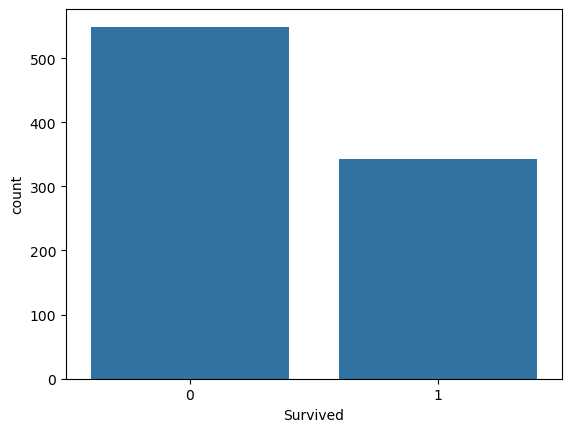

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x='Survived')

<Axes: xlabel='Age', ylabel='Count'>

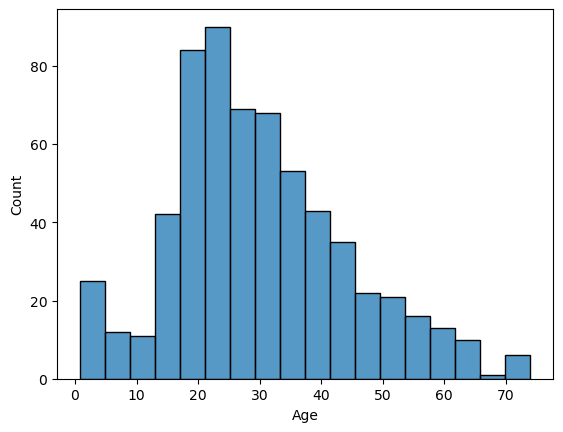

In [11]:
sns.histplot(data = df[(df['Sex'] == 'male') & (df['Survived']) == 0], x = 'Age')
#how to add more conditions???

<Axes: xlabel='Sex', ylabel='count'>

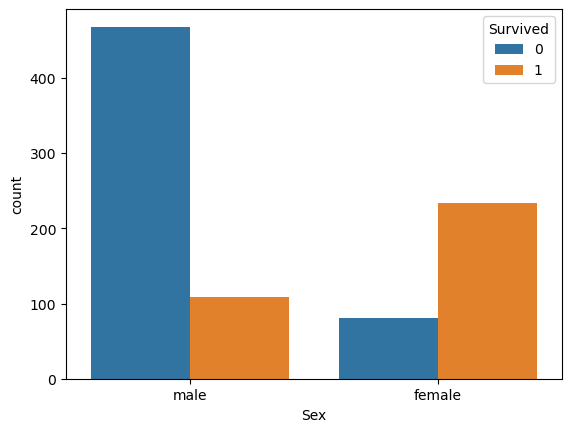

In [12]:
sns.countplot(data = df, x='Sex', hue= 'Survived')
#Question ho wto use this hue and when???
#Answer:
#The hue parameter adds a color split (or grouping) within each bar of your main x or y category.
#Use hue when:

#You want to compare a second categorical variable within your main one

#You want to visually break down results inside groups

<Axes: xlabel='Pclass', ylabel='count'>

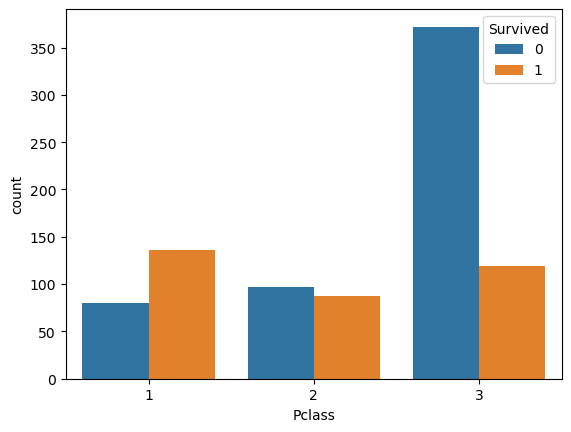

In [13]:
#ML developers use hue to quickly spot class imbalance, bias, or feature importance:

#For example:

#If almost all females survived, but males didn’t → gender is a strong feature
#If Pclass 3 had almost no survivors → class is predictive
sns.countplot(data = df, x='Pclass', hue= 'Survived')

In [14]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

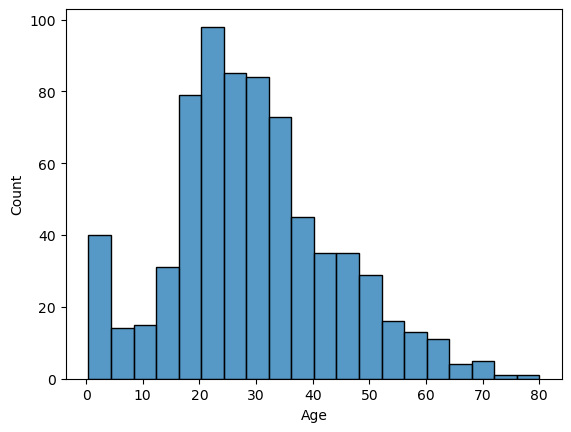

In [15]:
#Use when: You want to see the distribution of a single numeric column
sns.histplot(data = df, x= 'Age',bins=20)

<Axes: xlabel='Pclass', ylabel='Age'>

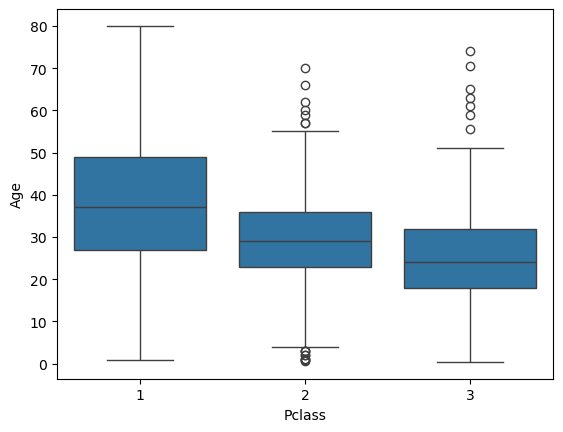

In [16]:
#Use when: You want to compare numeric distributions across categories + spot outliers
sns.boxplot(data = df, x='Pclass',y='Age')
#Question: Whst is Pclass and how to read boxplot
#Pclss is passenger class

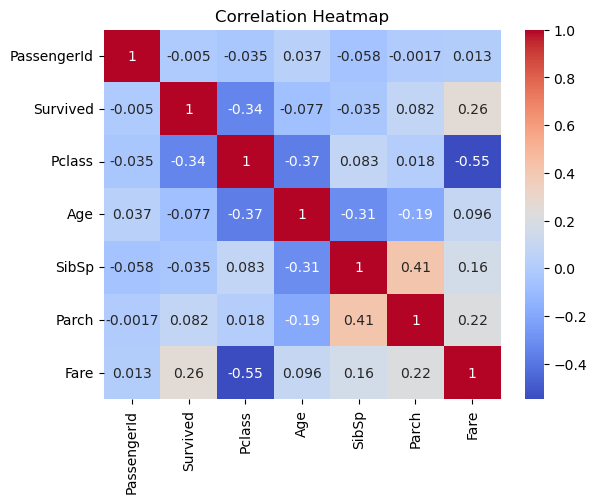

In [17]:
#sns.heatmap(df.corr(), annot= True)
#this will throw error because corr works only for numeric columns
#A negative correlation means:

#“As one variable increases, the other tends to decrease.
df_numeric = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

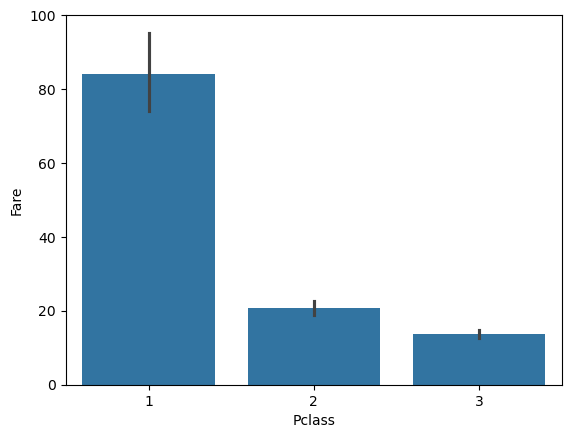

In [18]:
#Use when: You want to compare the average of a numeric value across categories
sns.barplot(x='Pclass', y='Fare', data=df)


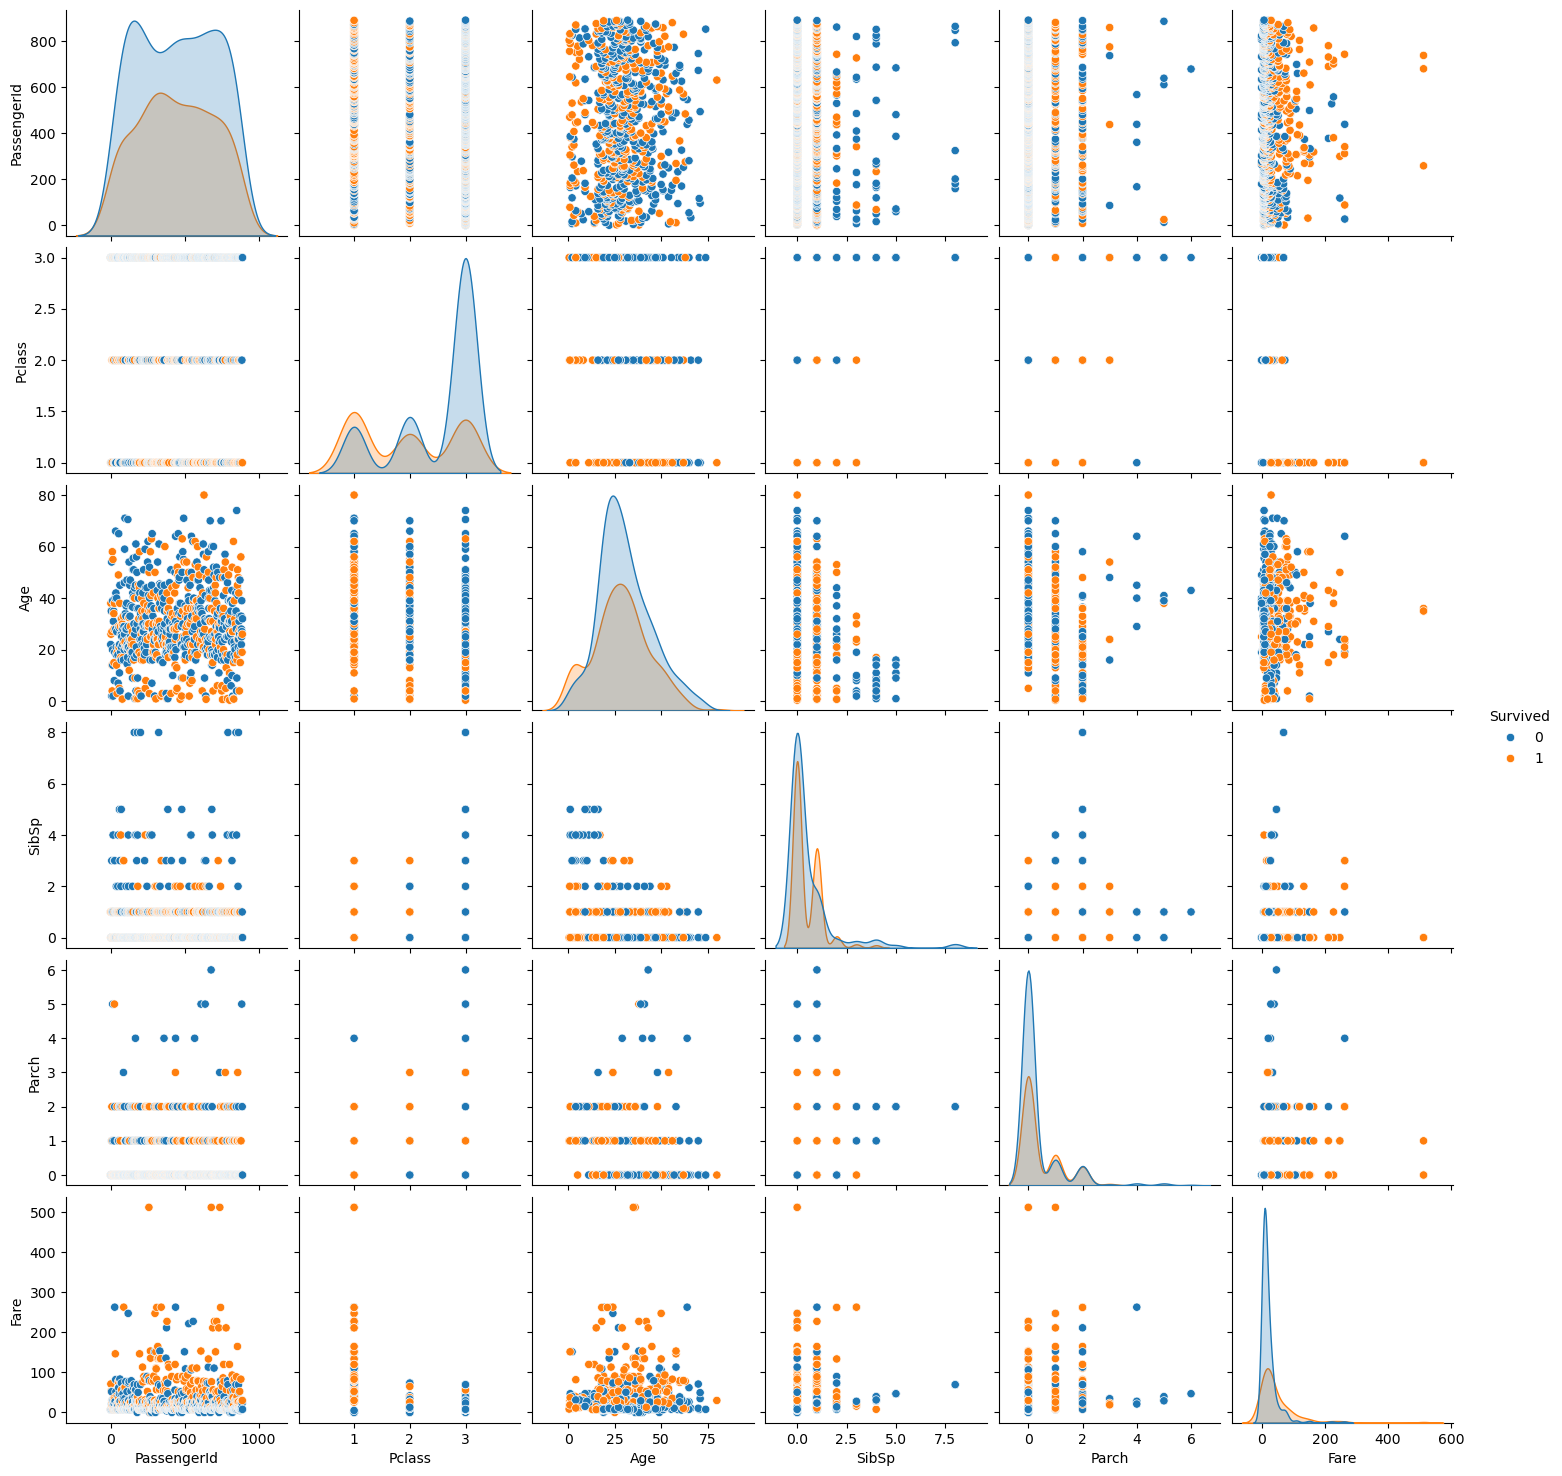

In [19]:
#Use when: You want to quickly see scatter + histogram + correlation across all numeric columns
sns.pairplot(df, hue='Survived')


<Axes: xlabel='Age', ylabel='Fare'>

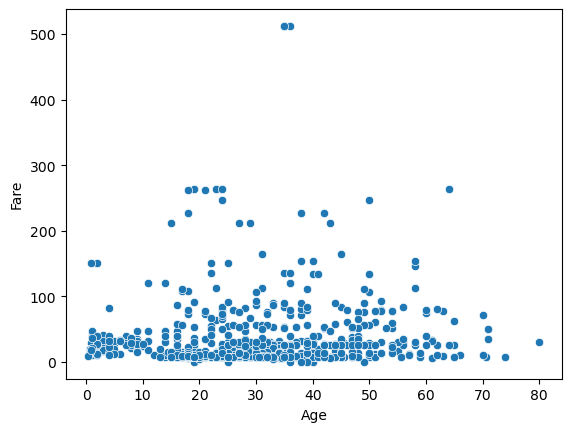

In [20]:
#Use when: You want to see relationship between two numeric columns
sns.scatterplot(x='Age', y='Fare', data=df)


<Axes: xlabel='Pclass', ylabel='Age'>

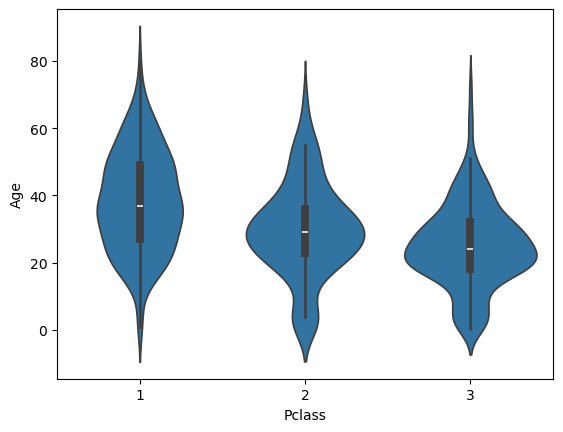

In [21]:
#Like boxplot, but also shows distribution shape
sns.violinplot(x='Pclass', y='Age', data=df)


In [22]:
df_numeric.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [23]:
#Part 3: Feature Engineering + Save Cleaned Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
#lets remove irrelavant columns
df.drop(['Name','Cabin','Ticket'], axis = 1, inplace = True)
#Reason: These contain too many unique text values or too much missing data

#question:
#what is axis and inplace parameter do?


#The inplace parameter tells pandas:
#“Make the changes directly to the original object instead of returning a new one.”
#but now will be deprecated soon


In [25]:
#Handling missing data

#Filling missing age with median
df['Age'] = df['Age'].fillna(df['Age'].median())


#drop rows with missing embarked
df.dropna(subset=['Embarked'],inplace = True)


#Question: Is these 2 the only way how we handle missing data??

#Anwer:
#Drop rows (df.dropna()) | If only a few rows are missing, and they’re not critical | df.dropna(subset=['Embarked'])

#Fill with mean/median/mode | Numeric columns | df['Age'].fillna(df['Age'].median())

#Fill with constant | Categorical columns | df['Embarked'].fillna('S')

#Forward/Backward fill | Time series data | df.fillna(method='ffill')

#Model-based imputation | Use ML to predict missing values | Advanced technique

#KNN imputer / Iterative imputer | Smart statistical guesses | sklearn.impute.KNNImputer()

In [26]:
#Encode Categorical Columns

df['Sex']= df['Sex'].map({'male':0,'female':1})

#Encode Embarked using get_dummies:
df = pd.get_dummies(df, columns=['Embarked'], drop_first = False)


#QUestions:
#Why do we ecode and when do we need to encode
#what is get_dummies exactly do and what is the use of drop_first

#Answer:
#If a column has N categories, get_dummies() by default creates N columns.
#But that's unnecessary — you only need (N-1) because the last one can be inferred from the rest.



In [27]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,False,False,True
1,2,1,1,1,38.0,1,0,71.2833,True,False,False
2,3,1,3,1,26.0,0,0,7.9250,False,False,True
3,4,1,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,0,35.0,0,0,8.0500,False,False,True


In [28]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.350956,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,0.477538,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)
df['Embarked_C'] = df['Embarked_C'].astype(int)

In [32]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.350956,29.315152,0.524184,0.382452,32.096681,0.724409,0.086614,0.724409
std,256.998173,0.486260,0.834700,0.477538,12.984932,1.103705,0.806761,49.697504,0.447063,0.281427,0.447063
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,668.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [ ]:
Why We Use drop_first=True in pd.get_dummies()
✅ TL;DR:
We use drop_first=True to avoid multicollinearity, especially for linear or logistic regression models.
Why Multicollinearity Is a Problem?
In linear/logistic regression, if features are perfectly correlated, the model can’t compute 
coefficients properly — it becomes unstable, and results become unreliable or invalid

Rule of Thumb:
Model Type	Drop One Dummy?
Linear Regression	✅ Yes — drop_first=True recommended
Logistic Regression	✅ Yes
Decision Trees / Random Forest	❌ Not necessary (they don’t care about multicollinearity)


Height_cm = Height * 2.54

So these two features are perfectly correlated.

✅ This is called multicollinearity — when one feature is a mathematical function of another.

 Why It's a Problem:
In linear/logistic regression, the model tries to learn weights for each column.
But if two columns mean the same thing, the model gets confused about how to assign importance.

➡️ Result:

Model becomes unstable

Coefficients swing wildly

Interpretability is lost

In some cases, the model may even fail to train

That’s why we avoid multicollinearity by:

Dropping redundant columns (like one dummy variable from get_dummies)

Or using models that don’t care (like trees)

In [33]:
#will now save the cleaned data
df.to_csv('titanic_cleaned.csv', index=False)
